In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv('C:/Users/ZITIAO/Desktop/All_Companies_Data_16-23.csv')
pd.set_option('display.float_format', '{:,}'.format)

# 预览数据
df.head()


,Source.Name,OPERATOR NAME,Employee 2023,Turnover 2023,Employee 2022,Turnover 2022,Employee 2021,Turnover 2021,Employee 2020,Turnover 2020,Employee 2019,Turnover 2019,Employee 2018,Turnover 2018,Employee 2017,Turnover 2017,Employee 2016,Turnover 2016,Source
0,Copper_Company_data_16-23.csv,3C Waste Limited,25.0,"2,011,000.0",28.0,"18,618,000.0",33.0,"26,383,000.0",46.0,"21,368,000.0",48.0,"32,083,000.0",49.0,"32,031,000.0",54.0,"39,644,000.0",64.0,"69,259,000.0",https://app.endole.co.uk/company/02632581-3c-w...
1,Benzo_Company_data_16-23.csv,Anglian Water,"5,295.0","1,495,000,000.0","5,129.0","1,400,000,000.0","4,882.0","1,352,000,000.0","4,984.0","1,420,000,000.0","4,764.0","1,355,000,000.0","4,600.0","1,248,900,000.0","4,462.0","1,227,000,000.0","4,432.0","1,185,000,000.0",https://app.endole.co.uk/company/02366656-angl...
2,Copper_Company_data_16-23.csv,biffa waste services ltd,"6,610.0","1,188,000,000.0","5,553.0","904,900,000.0","4,686.0","715,300,000.0","4,688.0","806,300,000.0","4,268.0","701,200,000.0","4,215.0","683,600,000.0","4,469.0","651,400,000.0","4,336.0","658,500,000.0",https://app.endole.co.uk/company/00946107-biff...
3,Fluoranthene_Company_data_16-23.csv,Bradley Park Waste Management Limited,6.0,NaN,8.0,NaN,13.0,NaN,19.0,NaN,NaN,NaN,20.0,NaN,23.0,NaN,21.0,NaN,https://app.endole.co.uk/company/06972355-brad...
4,Copper_Company_data_16-23.csv,brisitsh sugar plc,"1,434.0","1,037,900,000.0","1,498.0","849,800,000.0","1,578.0","698,300,000.0","1,616.0","669,500,000.0","1,639.0","556,900,000.0","1,667.0","616,800,000.0","1,717.0","633,000,000.0","1,834.0","585,400,000.0",https://app.endole.co.uk/company/00315158-brit...


In [3]:
df.info()
df.describe()

# 检查缺失值
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Source.Name    53 non-null     object 
 1   OPERATOR NAME  53 non-null     object 
 2   Employee 2023  49 non-null     float64
 3   Turnover 2023  46 non-null     float64
 4   Employee 2022  49 non-null     float64
 5   Turnover 2022  46 non-null     float64
 6   Employee 2021  47 non-null     float64
 7   Turnover 2021  46 non-null     float64
 8   Employee 2020  49 non-null     float64
 9   Turnover 2020  47 non-null     float64
 10  Employee 2019  49 non-null     float64
 11  Turnover 2019  46 non-null     float64
 12  Employee 2018  49 non-null     float64
 13  Turnover 2018  45 non-null     float64
 14  Employee 2017  49 non-null     float64
 15  Turnover 2017  44 non-null     float64
 16  Employee 2016  49 non-null     float64
 17  Turnover 2016  45 non-null     float64
 18  Source      

Source.Name      0
OPERATOR NAME    0
Employee 2023    4
Turnover 2023    7
Employee 2022    4
Turnover 2022    7
Employee 2021    6
Turnover 2021    7
Employee 2020    4
Turnover 2020    6
Employee 2019    4
Turnover 2019    7
Employee 2018    4
Turnover 2018    8
Employee 2017    4
Turnover 2017    9
Employee 2016    4
Turnover 2016    8
Source           1
dtype: int64

In [5]:
# 找出所有 Turnover 列（列名包含 'Turnover'）
turnover_cols = [col for col in df.columns if 'Turnover' in col]

# 将这些列的值统一换算为百万（除以1_000_000）
df[turnover_cols] = df[turnover_cols] / 1_000_000


In [7]:
years = list(range(2016, 2024))

total_employees = []
total_turnover = []

for year in years:
    emp_col = f'Employee {year}'
    rev_col = f'Turnover {year}'
    total_employees.append(df[emp_col].sum(skipna=True))
    total_turnover.append(df[rev_col].sum(skipna=True))

# 构建 DataFrame
trend_df = pd.DataFrame({
    'Year': years,
    'Total Employees': total_employees,
    'Total Turnover': total_turnover
})

# 计算人均营业额
trend_df['Revenue per Employee'] = trend_df['Total Turnover'] / trend_df['Total Employees']

trend_df


,Year,Total Employees,Total Turnover,Revenue per Employee
0,2016,"90,854.0","29,550.771547999997",0.3252555919167015
1,2017,"90,642.0","30,774.406946999996",0.3395159743496392
2,2018,"91,678.0","34,424.320459",0.37549161695281313
3,2019,"90,443.0","30,795.756975999997",0.34049906544453407
4,2020,"95,458.0","28,806.590014999998",0.3017724026797125
5,2021,"94,405.0","36,271.783219000004",0.3842146413749272
6,2022,"96,946.0","49,305.94766400001",0.5085918724238236
7,2023,"97,281.0","42,541.647934",0.4373068526639323


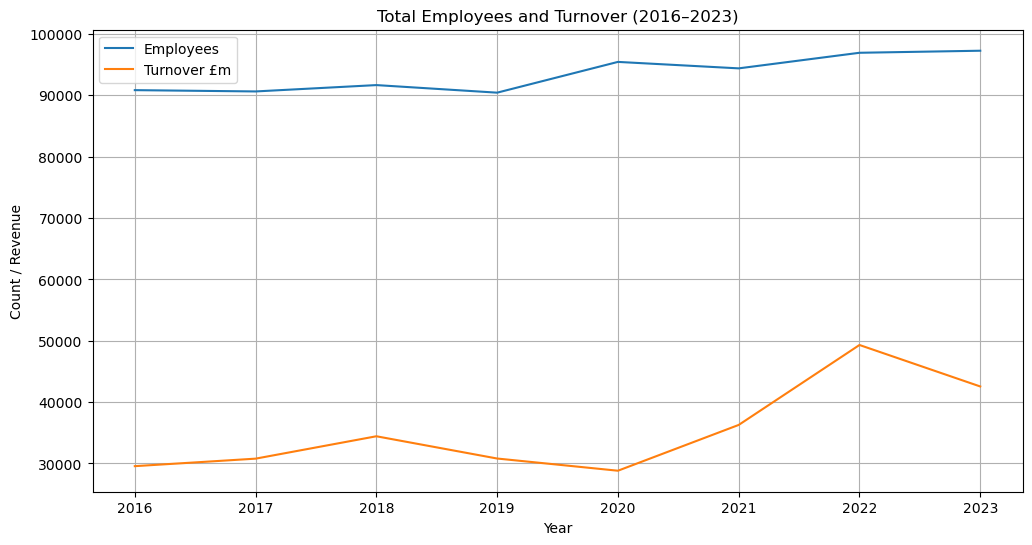

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=trend_df, x='Year', y='Total Employees', label='Employees')
sns.lineplot(data=trend_df, x='Year', y='Total Turnover', label='Turnover £m')
plt.title('Total Employees and Turnover (2016–2023)')
plt.ylabel('Count / Revenue')
plt.grid(True)
plt.legend()
plt.show()


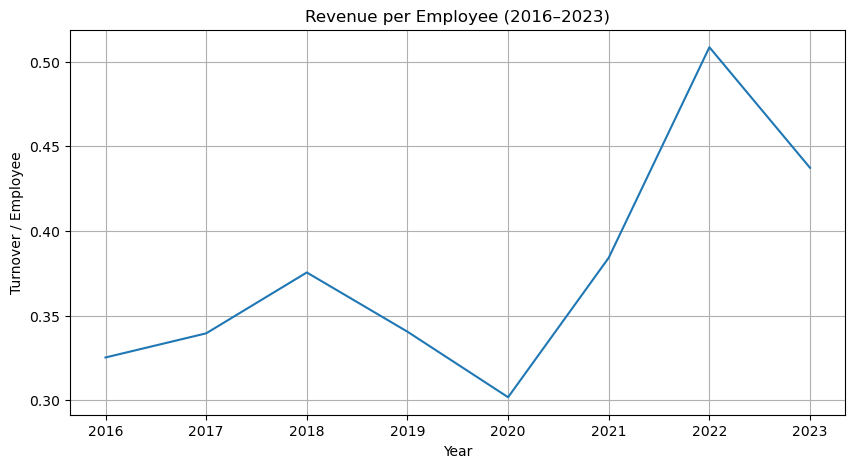

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(data=trend_df, x='Year', y='Revenue per Employee')
plt.title('Revenue per Employee (2016–2023)')
plt.ylabel('Turnover / Employee')
plt.grid(True)
plt.show()


In [15]:
df_2023 = df[['OPERATOR NAME', 'Employee 2023', 'Turnover 2023']].copy()
df_2023 = df_2023.dropna()

# 添加人均营收列
df_2023['Revenue per Employee'] = df_2023['Turnover 2023'] / df_2023['Employee 2023']

# 排名前10
df_2023.sort_values(by='Revenue per Employee', ascending=False).head(10)


,OPERATOR NAME,Employee 2023,Turnover 2023,Revenue per Employee
12,Esso Petroleum Company Ltd,"1,171.0","8,349.0",7.129803586678053
26,Phillips 66 Limited,943.0,"6,062.0",6.428419936373277
29,rwe generation uk plc,792.0,"2,805.0",3.5416666666666665
25,Palm Paper Limited,191.0,218.57,1.1443455497382198
44,veolia es landfill limited,141.0,134.599,0.9546028368794326
15,Haltermann Carless UK Limited,175.0,128.935,0.7367714285714286
4,brisitsh sugar plc,"1,434.0","1,037.9",0.7237796373779638
46,Viridor Waste Management Limited (Viridor Limi...,"1,014.0",672.1,0.6628205128205128
31,SCA Hygiene Products UK Limited (Essity UK Lim...,"1,355.0",858.766,0.6337756457564575
37,Standard Wool (UK) Limited,62.0,31.61,0.5098387096774194
